In [1]:
!wget https://ars.els-cdn.com/content/image/1-s2.0-S258900422101261X-mmc3.csv

--2022-02-17 12:06:08--  https://ars.els-cdn.com/content/image/1-s2.0-S258900422101261X-mmc3.csv
Resolving ars.els-cdn.com (ars.els-cdn.com)... 104.17.142.36, 104.17.143.36, 2606:4700::6811:8e24, ...
Connecting to ars.els-cdn.com (ars.els-cdn.com)|104.17.142.36|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 421119 (411K) [text/csv]
Saving to: ‘1-s2.0-S258900422101261X-mmc3.csv’

1-s2.0-S25890042210 100%[===================>] 411.25K  --.-KB/s    in 0.02s   

2022-02-17 12:06:09 (18.0 MB/s) - ‘1-s2.0-S258900422101261X-mmc3.csv’ saved [421119/421119]



In [29]:
!wget https://ars.els-cdn.com/content/image/1-s2.0-S258900422101261X-mmc2.csv

--2022-02-24 14:45:21--  https://ars.els-cdn.com/content/image/1-s2.0-S258900422101261X-mmc2.csv
Resolving ars.els-cdn.com (ars.els-cdn.com)... 104.17.143.36, 104.17.142.36, 2606:4700::6811:8e24, ...
Connecting to ars.els-cdn.com (ars.els-cdn.com)|104.17.143.36|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 53807 (53K) [text/csv]
Saving to: ‘1-s2.0-S258900422101261X-mmc2.csv’

1-s2.0-S25890042210 100%[===================>]  52.55K  --.-KB/s    in 0.005s  

2022-02-24 14:45:21 (9.81 MB/s) - ‘1-s2.0-S258900422101261X-mmc2.csv’ saved [53807/53807]



In [31]:
import pandas as pd
from scipy.stats import mannwhitneyu
import scipy.stats as stats
import seaborn as sns

In [4]:
pwd

'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/notebooks'

In [10]:
marker_list = pd.read_csv('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/notebooks/cell-type-markers.csv')
marker_list['gene'] = marker_list['gene'].str.upper()


In [12]:
pd.melt(marker_list, id_vars=['cell_type'], value_vars=['rank'])

cell_type variable  value
0        Astro     rank      1
1        Astro     rank      2
2        Astro     rank      3
3        Astro     rank      4
4        Astro     rank      5
...        ...      ...    ...
2268      VLMC     rank     96
2269      VLMC     rank     97
2270      VLMC     rank     98
2271      VLMC     rank     99
2272      VLMC     rank    100

[2273 rows x 3 columns]

In [5]:
df_ensg_name = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/ensg_geneid_symbol.csv', sep='\t')[['GeneID', 'Ensembl_gene_identifier', 'Symbol', 'type_of_gene']]



df_ensg_name = df_ensg_name.drop_duplicates(['Ensembl_gene_identifier', 'Symbol'])

df_ensg_name = df_ensg_name.drop_duplicates(['Ensembl_gene_identifier'])
df_ensg_name = df_ensg_name.drop_duplicates(['Symbol'])



In [6]:
marker_list.merge(df_ensg_name, right_on='Symbol', left_on='gene')

group cell_type  rank      gene  recurrence     auroc  \
0     Non-Neuronal     Astro     1    SLC1A2           6  0.995769   
1     Non-Neuronal     Astro     2       NTM           6  0.978977   
2     Non-Neuronal     Astro     3    SLC1A3           6  0.972470   
3     Non-Neuronal     Astro     4    GABRB1           6  0.958026   
4     Non-Neuronal     Astro     5    TSPAN7           6  0.956186   
...            ...       ...   ...       ...         ...       ...   
2050  Non-Neuronal      VLMC    91     PARVA           2  0.638932   
2051  Non-Neuronal      VLMC    96  SH3PXD2A           2  0.630981   
2052  Non-Neuronal      VLMC    97       NXN           2  0.629492   
2053  Non-Neuronal      VLMC    98     PRDM6           2  0.625416   
2054  Non-Neuronal      VLMC   100     SNED1           2  0.613429   

      fold_change  fold_change_detection   expression  precision  ...  snSS  \
0       79.327970               3.925241  6011.876920   0.627385  ...  True   
1       18.671875               3.094278  3039.715310   0.591128  ...  True   
2       16.164421               3.715663  3039.491778   0.620450  ...  True   
3       48.232032               5.003564  1849.913350   0.683010  ...  True   
4       12.682771               2.162795  2402.956782   0.507171  ...  True   
...           ...                    ...          ...        ...  ...   ...   
2050     2.126190               1.426886     0.000000   0.100309  ...   NaN   
2051     2.410348               2.116879     0.000000   0.127298  ...   NaN   
2052     0.582957               0.256502     0.000000   0.054695  ...   NaN   
2053    13.189692              12.174497     0.000000        NaN  ...   NaN   
2054     1.294267               0.901668     0.000000        NaN  ...   NaN   

      scCv2  snCv2 snCv3M scCv3 snCv3Z GeneID  Ensembl_gene_identifier  \
0      True   True   True  True   True   6506          ENSG00000110436   
1      True   True   True  True   True  50863          ENSG00000182667   
2      True   True   True  True   True   6507          ENSG00000079215   
3      True   True   True  True   True   2560          ENSG00000163288   
4      True   True   True  True   True   7102          ENSG00000156298   
...     ...    ...    ...   ...    ...    ...                      ...   
2050   True  False   True   NaN  False  55742          ENSG00000197702   
2051  False  False   True   NaN   True   9644          ENSG00000107957   
2052  False  False   True   NaN   True  64359          ENSG00000167693   
2053  False  False   True   NaN   True  93166          ENSG00000061455   
2054  False  False   True   NaN   True  25992          ENSG00000162804   

        Symbol    type_of_gene  
0       SLC1A2  protein-coding  
1          NTM  protein-coding  
2       SLC1A3  protein-coding  
3       GABRB1  protein-coding  
4       TSPAN7  protein-coding  
...        ...             ...  
2050     PARVA  protein-coding  
2051  SH3PXD2A  protein-coding  
2052       NXN  protein-coding  
2053     PRDM6  protein-coding  
2054     SNED1  protein-coding  

[2055 rows x 24 columns]

In [33]:

for i in marker_list.groupby(['cell_type']).groups.keys():
    print (i)

Astro
Endo
L2/3 IT
L4/5 IT
L5 IT
L5 PT
L5/6 NP
L6 CT
L6 IT
L6 IT Car3
L6b
Lamp5
Meis2
Micro-PVM
Oligo
Peri
Pvalb
SMC
Sncg
Sst
Sst Chodl
VLMC
Vip


In [23]:
file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates/'
                                

file_name = f'10kbp_raw/max/intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'

hic_to_coexp = pd.read_csv(f'{file_path}/{file_name}', sep='\t')

In [24]:
hic_to_coexp

gene_id_jac_sim chrom_jac_sim gene_id_exp_file chrom_exp_file       auc
0      ENSG00000143344          chr1  ENSG00000143344           chr1  0.607974
1      ENSG00000117632          chr1  ENSG00000117632           chr1  0.633632
2      ENSG00000081692          chr1  ENSG00000081692           chr1  0.541066
3      ENSG00000162888          chr1  ENSG00000162888           chr1  0.669963
4      ENSG00000118292          chr1  ENSG00000118292           chr1  0.628576
...                ...           ...              ...            ...       ...
23460  ENSG00000100364         chr22  ENSG00000100364          chr22  0.563973
23461  ENSG00000100342         chr22  ENSG00000100342          chr22  0.792228
23462  ENSG00000187051         chr22  ENSG00000187051          chr22  0.595679
23463  ENSG00000196588         chr22  ENSG00000196588          chr22  0.589927
23464  ENSG00000224050         chr22  ENSG00000224050          chr22  0.840909

[23465 rows x 5 columns]

In [40]:
df_list = []
for i in marker_list.groupby(['cell_type']).groups.keys():
    updated_list =  marker_list[marker_list['cell_type']== i]
    updated_list = updated_list.merge(df_ensg_name, right_on='Symbol', left_on='gene')
    dfh = hic_to_coexp.merge(updated_list, right_on='Ensembl_gene_identifier', left_on='gene_id_jac_sim')
    dfh['cell_type'] = i
    print (i)
    df_list.append(dfh)
    

Astro
Endo
L2/3 IT
L4/5 IT
L5 IT
L5 PT
L5/6 NP
L6 CT
L6 IT
L6 IT Car3
L6b
Lamp5
Meis2
Micro-PVM
Oligo
Peri
Pvalb
SMC
Sncg
Sst
Sst Chodl
VLMC
Vip


In [66]:
df = pd.concat(df_list)

In [67]:
df

gene_id_jac_sim chrom_jac_sim gene_id_exp_file chrom_exp_file       auc  \
0   ENSG00000135750          chr1  ENSG00000135750           chr1  0.610443   
1   ENSG00000142611          chr1  ENSG00000142611           chr1  0.597404   
2   ENSG00000117592          chr1  ENSG00000117592           chr1  0.465077   
3   ENSG00000132692          chr1  ENSG00000132692           chr1  0.589129   
4   ENSG00000170989          chr1  ENSG00000170989           chr1  0.538242   
..              ...           ...              ...            ...       ...   
78  ENSG00000161381         chr17  ENSG00000161381          chr17  0.591368   
79  ENSG00000063015         chr17  ENSG00000063015          chr17  0.616021   
80  ENSG00000141668         chr18  ENSG00000141668          chr18  0.616040   
81  ENSG00000006016         chr19  ENSG00000006016          chr19  0.764578   
82  ENSG00000234965         chr22  ENSG00000234965          chr22  0.518038   

           group cell_type  rank    gene  recurrence  ...  snSS  scCv2  snCv2  \
0   Non-Neuronal     Astro    79   KCNK1           6  ...  True   True   True   
1   Non-Neuronal     Astro    66  PRDM16           6  ...  True   True   True   
2   Non-Neuronal     Astro    22   PRDX6           6  ...  True   True   True   
3   Non-Neuronal     Astro    29    BCAN           6  ...  True   True   True   
4   Non-Neuronal     Astro    39   S1PR1           6  ...  True   True   True   
..           ...       ...   ...     ...         ...  ...   ...    ...    ...   
78     GABAergic       Vip    86  PLXDC1           5  ...  True  False  False   
79     GABAergic       Vip    70    SEZ6           5  ...  True  False   True   
80     GABAergic       Vip     8   CBLN2           7  ...  True   True   True   
81     GABAergic       Vip    99   CRLF1           4  ...  True  False  False   
82     GABAergic       Vip    40  SHISA8           7  ...  True   True   True   

    snCv3M  scCv3  snCv3Z  GeneID  Ensembl_gene_identifier  Symbol  \
0     True   True    True    3775          ENSG00000135750   KCNK1   
1     True   True    True   63976          ENSG00000142611  PRDM16   
2     True   True    True    9588          ENSG00000117592   PRDX6   
3     True   True    True   63827          ENSG00000132692    BCAN   
4     True   True    True    1901          ENSG00000170989   S1PR1   
..     ...    ...     ...     ...                      ...     ...   
78    True   True    True   57125          ENSG00000161381  PLXDC1   
79    True  False    True  124925          ENSG00000063015    SEZ6   
80    True   True    True  147381          ENSG00000141668   CBLN2   
81    True   True   False    9244          ENSG00000006016   CRLF1   
82    True   True    True  440829          ENSG00000234965  SHISA8   

      type_of_gene  
0   protein-coding  
1   protein-coding  
2   protein-coding  
3   protein-coding  
4   protein-coding  
..             ...  
78  protein-coding  
79  protein-coding  
80  protein-coding  
81  protein-coding  
82  protein-coding  

[1894 rows x 29 columns]

In [47]:
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck

def run_egad(go, nw, **kwargs):
    """EGAD running function
    
    Wrapper to lower level functions for EGAD

    EGAD measures modularity of gene lists in co-expression networks. 

    This was translated from the MATLAB version, which does tiled Cross Validation
    
    The useful kwargs are:
    int - nFold : Number of CV folds to do, default is 3, 
    int - {min,max}_count : limits for number of terms in each gene list, these are exclusive values


    Arguments:
        go {pd.DataFrame} -- dataframe of genes x terms of values [0,1], where 1 is included in gene lists
        nw {pd.DataFrame} -- dataframe of co-expression network, genes x genes
        **kwargs 
    
    Returns:
        pd.DataFrame -- dataframe of terms x metrics where the metrics are 
        ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    """
    assert nw.shape[0] == nw.shape[1] , 'Network is not square'
    #print(nw.index)
    #nw.columns = nw.columns.astype(int)
    #print(nw.columns.astype(int))
    assert np.all(nw.index == nw.columns) , 'Network index and columns are not in the same order'

    #nw_mask = nw.isna().sum(axis=1) != nw.shape[1]
    #nw = nw.loc[nw_mask, nw_mask].astype('float')
    #np.fill_diagonal(nw.values, 1)
    return _runNV(go, nw, **kwargs)

def _runNV(go, nw, nFold=3, min_count=1, max_count=5000000):

    #Make sure genes are same in go and nw
    #go.index = go.index.map(str) 
    #nw.index = nw.index.map(str)
    #nw.index = nw.index.str.replace('_', '')
    #go.index = go.index.str.replace('_', '')
    #print (nw)
    genes_intersect = go.index.intersection(nw.index)


    #print (genes_intersect)
    go = go.loc[genes_intersect, :]
    nw = nw.loc[genes_intersect, genes_intersect]
    #print (go)
    print (nw.shape)
    print (go.shape)
    sparsity = 1.0 - np.count_nonzero(go) / go.size
    print (sparsity)
    sparsity = 1.0 - np.count_nonzero(nw) / nw.size
    print (sparsity)
    #print(nw
    #print(go
    nw_mask = nw.isna().sum(axis=1) != nw.shape[1]
    nw = nw.loc[nw_mask, nw_mask].astype('float')
    np.fill_diagonal(nw.values, 1)
    #Make sure there aren't duplicates
    duplicates = nw.index.duplicated(keep='first')
    nw = nw.loc[~duplicates, ~duplicates]

    go = go.loc[:, (go.sum(axis=0) > min_count) & (go.sum(axis=0) < max_count)]
    go = go.loc[~go.index.duplicated(keep='first'), :]
    #print(go)

    roc = _new_egad(go.values, nw.values, nFold)

    col_names = ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    #Put output in dataframe
    return pd.DataFrame(dict(zip(col_names, roc)), index=go.columns)

def _new_egad(go, nw, nFold):

    #Build Cross validated Positive
    x, y = np.where(go)
    #print(x, y)
    cvgo = {}
    for i in np.arange(nFold):
        a = x[i::nFold]
        #print(a)
        b = y[i::nFold]
        dat = np.ones_like(a)
        mask = sparse.coo_matrix((dat, (a, b)), shape=go.shape)
        cvgo[i] = go - mask.toarray()

    CVgo = np.concatenate(list(cvgo.values()), axis=1)
    #print(CVgo)

    sumin = np.matmul(nw.T, CVgo)

    degree = np.sum(nw, axis=0)
    #print(degree)
    #print(degree[:, None])

    predicts = sumin / degree[:, None]
    #print(predicts)

    np.place(predicts, CVgo > 0, np.nan)

    #print(predicts)

    #Calculate ranks of positives
    rank_abs = lambda x: stats.rankdata(np.abs(x))
    predicts2 = np.apply_along_axis(rank_abs, 0, predicts)
    #print(predicts2)

    #Masking Nans that were ranked (how tiedrank works in matlab)
    predicts2[np.isnan(predicts)] = np.nan
    #print(predicts2)

    filtering = np.tile(go, nFold)
    #print(filtering)

    #negatives :filtering == 0
    #Sets Ranks of negatives to 0
    np.place(predicts2, filtering == 0, 0)

    #Sum of ranks for each prediction
    p = bottleneck.nansum(predicts2, axis=0)
    n_p = np.sum(filtering, axis=0) - np.sum(CVgo, axis=0)

    #Number of negatives
    #Number of GO terms - number of postiive
    n_n = filtering.shape[0] - np.sum(filtering, axis=0)

    roc = (p / n_p - (n_p + 1) / 2) / n_n
    U = roc * n_p * n_n
    Z = (np.abs(U - (n_p * n_n / 2))) / np.sqrt(n_p * n_n *(n_p + n_n + 1) / 12)
    roc = roc.reshape(nFold, go.shape[1])
    Z = Z.reshape(nFold, go.shape[1])
    #Stouffer Z method
    Z = bottleneck.nansum(Z, axis=0) / np.sqrt(nFold)
    #Calc ROC of Neighbor Voting
    roc = bottleneck.nanmean(roc, axis=0)
    P = stats.norm.sf(Z)

    #Average degree for nodes in each go term
    avg_degree = degree.dot(go) / np.sum(go, axis=0)

    #Calc null auc for degree
    ranks = np.tile(stats.rankdata(degree), (go.shape[1], 1)).T

    np.place(ranks, go == 0, 0)

    n_p = bottleneck.nansum(go, axis=0)
    nn = go.shape[0] - n_p
    p = bottleneck.nansum(ranks, axis=0)

    roc_null = (p / n_p - ((n_p + 1) / 2)) / nn
    #print(roc)
    return roc, avg_degree, roc_null, P


In [48]:
    df = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/human_gene2go.csv', delim_whitespace=True)

    df['val'] = 1

    go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])

    go_table = go_table.fillna(0)
    
    go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])



In [49]:
go_table

GO:0000002  GO:0000003  GO:0000009  GO:0000010  GO:0000012  \
NetworkIDs                                                                    
ENSG00000000003         0.0         0.0         0.0         0.0         0.0   
ENSG00000000005         0.0         0.0         0.0         0.0         0.0   
ENSG00000000419         0.0         0.0         0.0         0.0         0.0   
ENSG00000000457         0.0         0.0         0.0         0.0         0.0   
ENSG00000000460         0.0         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
ENSG00000285505         0.0         0.0         0.0         0.0         0.0   
ENSG00000285507         0.0         0.0         0.0         0.0         0.0   
ENSG00000285508         0.0         0.0         0.0         0.0         0.0   
ENSG00000285509         0.0         0.0         0.0         0.0         0.0   
ENSG00000285516         0.0         0.0         0.0         0.0         0.0   

                 GO:0000014  GO:0000015  GO:0000016  GO:0000017  GO:0000018  \
NetworkIDs                                                                    
ENSG00000000003         0.0         0.0         0.0         0.0         0.0   
ENSG00000000005         0.0         0.0         0.0         0.0         0.0   
ENSG00000000419         0.0         0.0         0.0         0.0         0.0   
ENSG00000000457         0.0         0.0         0.0         0.0         0.0   
ENSG00000000460         0.0         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
ENSG00000285505         0.0         0.0         0.0         0.0         0.0   
ENSG00000285507         0.0         0.0         0.0         0.0         0.0   
ENSG00000285508         0.0         0.0         0.0         0.0         0.0   
ENSG00000285509         0.0         0.0         0.0         0.0         0.0   
ENSG00000285516         0.0         0.0         0.0         0.0         0.0   

                 ...  GO:2001293  GO:2001294  GO:2001295  GO:2001300  \
NetworkIDs       ...                                                   
ENSG00000000003  ...         0.0         0.0         0.0         0.0   
ENSG00000000005  ...         0.0         0.0         0.0         0.0   
ENSG00000000419  ...         0.0         0.0         0.0         0.0   
ENSG00000000457  ...         0.0         0.0         0.0         0.0   
ENSG00000000460  ...         0.0         0.0         0.0         0.0   
...              ...         ...         ...         ...         ...   
ENSG00000285505  ...         0.0         0.0         0.0         0.0   
ENSG00000285507  ...         0.0         0.0         0.0         0.0   
ENSG00000285508  ...         0.0         0.0         0.0         0.0   
ENSG00000285509  ...         0.0         0.0         0.0         0.0   
ENSG00000285516  ...         0.0         0.0         0.0         0.0   

                 GO:2001301  GO:2001302  GO:2001303  GO:2001304  GO:2001306  \
NetworkIDs                                                                    
ENSG00000000003         0.0         0.0         0.0         0.0         0.0   
ENSG00000000005         0.0         0.0         0.0         0.0         0.0   
ENSG00000000419         0.0         0.0         0.0         0.0         0.0   
ENSG00000000457         0.0         0.0         0.0         0.0         0.0   
ENSG00000000460         0.0         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
ENSG00000285505         0.0         0.0         0.0         0.0         0.0   
ENSG00000285507         0.0         0.0         0.0         0.0         0.0   
ENSG00000285508         0.0         0.0         0.0         0.0         0.0   
ENSG00000285509         0.0         0.0         0.0         0.0         0.0   
ENSG00000285516         0.0         0.0         0.0         0.0         0.0 

In [52]:
    from hicmatrix import HiCMatrix as hm
    from hicmatrix.lib import MatrixFileHandler
    import pandas as pd
    


    exp_file = hm.hiCMatrix('/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/human_prioAggNet.h5')
    #chr_list_1 = exp_file.getChrNames()
    
    exp_matrix = exp_file.matrix.toarray()
    exp_genes_all = [x[3].decode() for x in exp_file.cut_intervals]
    df_exp = pd.DataFrame(exp_matrix ,  index=exp_genes_all , columns = exp_genes_all)
    

In [13]:
df_exp

NameError: name 'df_exp' is not defined

In [56]:
    from hicmatrix import HiCMatrix as hm
    from hicmatrix.lib import MatrixFileHandler
    
    #np.fill_diagonal(exp_matrix , 0)
    df_exp = pd.DataFrame(exp_matrix ,  index=exp_genes_all , columns = exp_genes_all)
    df_2d = run_egad(go_table, df_exp)
    #df_2d.to_csv(f'{args.outfile}_egad_intra_only_type2.csv', sep='\t')

(16159, 16159)
(16159, 22926)
0.9953014382066222
0.0


<ipython-input-47-bd3f89597260>:134: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


In [ ]:
SRP_name='aggregates'
resolution='40kbp_raw'
exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/40kbp_raw/max/pcc/0/all_bins/KR_ranked_KR/hic_gene_corr_gw.h5'

jac_sim = hm.hiCMatrix(exp_file_path)
all_genes = [x[3].decode() for x in jac_sim.cut_intervals]
df_jac_corr = pd.DataFrame(jac_sim.matrix.toarray() ,  index=all_genes, columns = all_genes)


In [65]:
df_exp

ENSG00000278267  ENSG00000233750  ENSG00000268903  \
ENSG00000278267         1.000000         0.343890         0.487717   
ENSG00000233750         0.343890         1.000000         0.860658   
ENSG00000268903         0.487717         0.860658         1.000000   
ENSG00000269981         0.504516         0.809451         0.946427   
ENSG00000241860         0.479969         0.673940         0.811533   
...                          ...              ...              ...   
ENSG00000155959         0.276849         0.040029         0.130469   
ENSG00000155961         0.128407         0.128214         0.097678   
ENSG00000155962         0.073441         0.152424         0.278535   
ENSG00000224533         0.334817         0.349970         0.296989   
ENSG00000185973         0.401233         0.185124         0.287707   

                 ENSG00000269981  ENSG00000241860  ENSG00000279928  \
ENSG00000278267         0.504516         0.479969         0.343116   
ENSG00000233750         0.809451         0.673940         0.028341   
ENSG00000268903         0.946427         0.811533         0.065573   
ENSG00000269981         1.000000         0.833857         0.110389   
ENSG00000241860         0.833857         1.000000         0.083856   
...                          ...              ...              ...   
ENSG00000155959         0.077081         0.316597         0.176820   
ENSG00000155961         0.141587         0.323042         0.130175   
ENSG00000155962         0.298601         0.382400         0.077759   
ENSG00000224533         0.386713         0.498483         0.235486   
ENSG00000185973         0.322068         0.724452         0.291270   

                 ENSG00000279457  ENSG00000228463  ENSG00000237094  \
ENSG00000278267         0.896050         0.229694         0.550274   
ENSG00000233750         0.463029         0.399338         0.764022   
ENSG00000268903         0.767021         0.441015         0.856639   
ENSG00000269981         0.656542         0.527122         0.903084   
ENSG00000241860         0.508489         0.340035         0.944649   
...                          ...              ...              ...   
ENSG00000155959         0.678122         0.712112         0.395085   
ENSG00000155961         0.521158         0.579213         0.386790   
ENSG00000155962         0.585610         0.620367         0.564975   
ENSG00000224533         0.667091         0.538497         0.702738   
ENSG00000185973         0.626955         0.728197         0.779498   

                 ENSG00000225972  ...  ENSG00000185010  ENSG00000277203  \
ENSG00000278267         0.208983  ...         0.164307         0.385439   
ENSG00000233750         0.018238  ...         0.036482         0.231122   
ENSG00000268903         0.194718  ...         0.150049         0.649567   
ENSG00000269981         0.067739  ...         0.280591         0.514719   
ENSG00000241860         0.002976  ...         0.433731         0.334044   
...                          ...  ...              ...              ...   
ENSG00000155959         0.093009  ...         0.932798         0.870960   
ENSG00000155961         0.009413  ...         0.772858         0.644082   
ENSG00000155962         0.093091  ...         0.919599         0.646647   
ENSG00000224533         0.010708  ...         0.564739         0.443018   
ENSG00000185973         0.023739  ...         0.924385         0.664635   

                 ENSG00000165775  ENSG00000214827  ENSG00000185515  \
ENSG00000278267         0.298960         0.589250         0.373065   
ENSG00000233750         0.019885         0.179310         0.108605   
ENSG00000268903         0.146318         0.243782         0.220238   
ENSG00000269981         0.059280         0.163406         0.248240   
ENSG00000241860         0.145356         0.526769         0.550166   
...                          ...              ...              ...   
ENSG00000155959         0.999166         0.911992         0.999719   
ENSG00000155961         0.740986 

In [30]:
df_jac_corr

NameError: name 'df_jac_corr' is not defined

In [59]:
GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])
df_slim = df_2d[df_2d.index.isin(GO_groups['go_id'].tolist())]

In [7]:
GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])

In [9]:
GO_groups.to_csv('/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/aug4.GOslim')

In [63]:
df_slim 

AUC  AVG_NODE_DEGREE  DEGREE_NULL_AUC       P_Value
GO:0000003  0.585481      9558.834269         0.453758  2.078267e-24
GO:0000228  0.683412      9829.692204         0.508110  4.375792e-92
GO:0000902  0.699499      9461.287708         0.424424  1.277199e-73
GO:0002376  0.757050      9445.567077         0.435542  0.000000e+00
GO:0003013  0.704158      8413.040173         0.328264  1.092932e-50
...              ...              ...              ...           ...
GO:0055085  0.611109      9115.145765         0.410315  5.970539e-39
GO:0061024  0.599709     10570.749522         0.559604  6.288348e-22
GO:0065003  0.614840     10524.184371         0.573749  1.523067e-43
GO:0071554  0.701135     10085.966440         0.484092  1.939088e-01
GO:0071941  0.735857      9627.435182         0.382082  1.128792e-02

[134 rows x 4 columns]

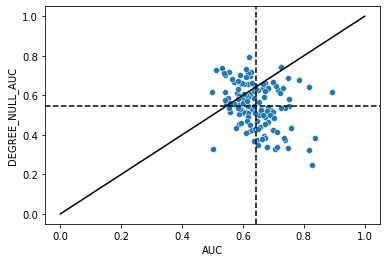

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_slim, x='AUC', y='DEGREE_NULL_AUC')
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_slim['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_slim['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

In [ ]:
import h5py
import logging
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import scipy.stats as stats
import os.path

    
def calc_auc(exp_file, jac_sim, outfile, auc_type, given_top_percentile=1 ,jac_sim_species='a', exp_file_species='a', ortho_genes="ortho_genes"):
    
        exp_genes_all = [x[3].decode() for x in exp_file.cut_intervals]
        exp_matrix = exp_file.matrix
        
        
        all_genes_all = [x[3].decode() for x in jac_sim.cut_intervals]
        
        entire_matrix = jac_sim.matrix
        entire_matrix = entire_matrix.astype('float32')
        
        
    
        if jac_sim_species != exp_file_species:
            df_1_1 = pd.read_csv(ortho_genes)
            df_1_1 = df_1_1.drop_duplicates(subset=[jac_sim_species], keep=False)
            df_1_1 = df_1_1.drop_duplicates(subset=[exp_file_species], keep=False)
            jac_sim_species_ortho_subset = list (set(all_genes_all) & set(df_1_1[jac_sim_species].tolist()))
            df_1_1 = df_1_1[df_1_1[jac_sim_species].isin(jac_sim_species_ortho_subset)]
            exp_file_species_ortho_subset = list (set(exp_genes_all) & set(df_1_1[exp_file_species].tolist()))
            df_1_1 = df_1_1[df_1_1[exp_file_species].isin(exp_file_species_ortho_subset)]
            subset_genes_exp_file = df_1_1[exp_file_species].tolist()
            subset_genes_jac_sim = df_1_1[jac_sim_species].tolist()
            
        else:
            subset_genes_exp_file = list (set(all_genes_all) & set(exp_genes_all))
            subset_genes_jac_sim  = list (set(all_genes_all) & set(exp_genes_all))
            
        exp_genes_index_list = [i for i, value in enumerate(exp_genes_all) if value in subset_genes_exp_file]
        exp_genes = [value for i, value in enumerate(exp_genes_all) if value in subset_genes_exp_file]
        exp_matrix  = csr_matrix(exp_matrix)[exp_genes_index_list, :][:, exp_genes_index_list]
        
        updated_cut_intervals = [exp_file.cut_intervals[x] for x in exp_genes_index_list]
        exp_file.update_matrix(exp_matrix,  updated_cut_intervals)
   
        exp_matrix = exp_matrix.toarray()
    
        

        rank_abs = lambda x: stats.rankdata(x, method='ordinal')
        exp_matrix = np.apply_along_axis(rank_abs, 1, exp_matrix)
        
        exp_matrix = exp_matrix * 1.0
        
        exp_matrix = exp_matrix.astype('float32')
        
        
        
        
        chr_list_2 = exp_file.getChrNames()

        
        all_gene_index_list = [i for i, value in enumerate(all_genes_all) if value in subset_genes_jac_sim]
        all_genes = [value for i, value in enumerate(all_genes_all) if value in subset_genes_jac_sim]
        
        entire_matrix  = csr_matrix(entire_matrix)[all_gene_index_list, :][:, all_gene_index_list]
        
        updated_cut_intervals = [jac_sim.cut_intervals[x] for x in all_gene_index_list]
        jac_sim.update_matrix(entire_matrix, updated_cut_intervals)
        
        entire_matrix = entire_matrix.toarray()
        entire_matrix = entire_matrix.astype('float32')
        
        
        
        chr_list_1 = jac_sim.getChrNames()

        max_value = entire_matrix.max() + 1 + exp_matrix.max()
        max_value = max_value.astype('float32')

        if auc_type == 'inter_only':
        
            for chrom in chr_list_1:

                start, end = jac_sim.getChrBinRange(chrom)
                
                entire_matrix[start: end, start: end] = max_value 
                
            for chrom in chr_list_2:

                start, end = exp_file.getChrBinRange(chrom)
                
                exp_matrix[start: end, start: end] = max_value 
                
        elif auc_type == 'inter_one_sided':
        
            for chrom in chr_list_1:

                start, end = jac_sim.getChrBinRange(chrom)
                
                entire_matrix[start: end, start: end] = max_value 
                
        
        elif auc_type == 'intra_only':

            coordinate_matrix = np.zeros(entire_matrix.shape,  dtype='float32')
            for chrom in chr_list_1:

                start, end = jac_sim.getChrBinRange(chrom)
                
                coordinate_matrix[start: end, start: end] = max_value
                
            inter_coodinates = np.where(coordinate_matrix != max_value)
            x_inter = inter_coodinates[0].tolist()
            y_inter = inter_coodinates[1].tolist()
            
            entire_matrix[x_inter, y_inter] = max_value
            np.fill_diagonal(entire_matrix , max_value)
            #entire_matrix.setdiag(max_value, k=0)
            
            
            coordinate_matrix = np.zeros(exp_matrix.shape,  dtype='float32')
            for chrom in chr_list_2:

                start, end = exp_file.getChrBinRange(chrom)
                
                coordinate_matrix[start: end, start: end] = max_value
                
            inter_coodinates = np.where(coordinate_matrix != max_value)
            x_inter = inter_coodinates[0].tolist()
            y_inter = inter_coodinates[1].tolist()
            exp_matrix[x_inter, y_inter] = max_value
            np.fill_diagonal(exp_matrix , max_value)
            #exp_matrix.setdiag(max_value, k=0)


        else:

            np.fill_diagonal(entire_matrix , max_value)

            np.fill_diagonal(exp_matrix , max_value)
            #exp_matrix.setdiag(max_value, k=0)
            #entire_matrix.setdiag(max_value, k=0)


        df_jac = pd.DataFrame(entire_matrix ,  index=all_genes, columns = all_genes)
        df_exp = pd.DataFrame(exp_matrix ,  index=exp_genes, columns = exp_genes)

        if jac_sim_species != exp_file_species:
            df_1_1 = pd.read_csv(ortho_genes)
            df_1_1 = df_1_1.drop_duplicates(subset=[jac_sim_species], keep=False)
            df_1_1 = df_1_1.drop_duplicates(subset=[exp_file_species], keep=False)
            jac_sim_species_ortho_subset = list (set(all_genes) & set(df_1_1[jac_sim_species].tolist()))
            df_1_1 = df_1_1[df_1_1[jac_sim_species].isin(jac_sim_species_ortho_subset)]
            exp_file_species_ortho_subset = list (set(exp_genes) & set(df_1_1[exp_file_species].tolist()))
            df_1_1 = df_1_1[df_1_1[exp_file_species].isin(exp_file_species_ortho_subset)]
            subset_genes_exp_file = df_1_1[exp_file_species].tolist()
            subset_genes_jac_sim = df_1_1[jac_sim_species].tolist()
            df_exp_subset = df_exp.loc[subset_genes_exp_file, subset_genes_exp_file]
            df_jac_subset = df_jac.loc[subset_genes_jac_sim, subset_genes_jac_sim]
            
        else:
            subset_genes_exp_file = list (set(all_genes) & set(exp_genes))
            subset_genes_jac_sim  = list (set(all_genes) & set(exp_genes))
            df_exp_subset = df_exp.loc[subset_genes_exp_file, subset_genes_exp_file]
            df_jac_subset = df_jac.loc[subset_genes_jac_sim, subset_genes_jac_sim]


        coodinates_1 = np.where(df_jac_subset == max_value)
        coodinates_2 = np.where(df_exp_subset == max_value)

        x_coo = coodinates_1[0].tolist() + coodinates_2[0].tolist()
        y_coo = coodinates_1[1].tolist() + coodinates_2[1].tolist()

        df_jac_subset.to_numpy()[x_coo, y_coo] = max_value
        df_exp_subset.to_numpy()[x_coo, y_coo] = np.nan

            
        rank_abs = lambda x: stats.rankdata(x)
        predicts2 = np.apply_along_axis(rank_abs, 1, df_jac_subset)
        predicts2 = predicts2.astype('float')
        
        predicts2[x_coo, y_coo] = np.nan
        
        top_percentile = 100 - given_top_percentile
                
        exp_upper = lambda x: np.where(x < np.percentile(x[~np.isnan(x)] , top_percentile), 0, 1.0) if x[~np.isnan(x)].shape[0] > 0 else np.zeros(x.shape[0])
        tp = np.apply_along_axis(exp_upper, 1, df_exp_subset)
        tp[x_coo, y_coo] = np.nan
        exp_upper = lambda x: np.where(x >= np.percentile(x[~np.isnan(x)] , top_percentile), 0, 1.0) if x[~np.isnan(x)].shape[0] > 0 else np.zeros(x.shape[0])
        tn = np.apply_along_axis(exp_upper, 1, df_exp_subset)
        tn[x_coo, y_coo] = np.nan
        pos_rank_sum = tp * predicts2
        auc_array = (((np.nansum(pos_rank_sum, axis=1) / (np.nansum(tp, axis=1)) )- (np.nansum(tp, axis=1) + 1)/2)) / np.nansum(tn, axis=1)
        
        df = pd.DataFrame(columns = ['gene_id_jac_sim', 'chrom_jac_sim', 'gene_id_exp_file', 'chrom_exp_file', 'auc'])  
        df['auc'] = auc_array.tolist()
        df['gene_id_exp_file'] = subset_genes_exp_file
        df['gene_id_jac_sim'] = subset_genes_jac_sim
        
        gene_list = [x[3].decode() for x in jac_sim.cut_intervals]
        _chrom_list = [x[0] for x in jac_sim.cut_intervals]
        df['chrom_jac_sim'] = [_chrom_list[gene_list.index(x)] for x in df['gene_id_jac_sim']]

        gene_list = [x[3].decode() for x in exp_file.cut_intervals]
        _chrom_list = [x[0] for x in exp_file.cut_intervals]
        df['chrom_exp_file'] = [_chrom_list[gene_list.index(x)] for x in df['gene_id_exp_file']]
        df.to_csv(outfile, sep='\t', index=False)
        
        
if __name__ == '__main__':

    
    import argparse
    parser = argparse.ArgumentParser()

    parser.add_argument('--outfile', default='tss',
                            help='tss or tss_max')
    parser.add_argument('--exp_file_path', default='tss',
                            help='tss or tss_max')
    parser.add_argument('--jac_sim_path', default='tss',
                            help='tss or tss_max')
    parser.add_argument('--auc_type', default='intra_only',
                            help='tss or tss_max')
    parser.add_argument('--jac_sim_species', default='a',
                            help='tss or tss_max')
    parser.add_argument('--exp_file_species', default='a',
                            help='tss or tss_max')
    parser.add_argument('--ortho_genes', default='b',
                            help='tss or tss_max')
    parser.add_argument('--given_top_percentile', default=1,
                            help='tss or tss_max')
    


    args = parser.parse_args()
    
    if not os.path.isfile(args.outfile):

    
        jac_sim = hm.hiCMatrix(args.jac_sim_path)
        exp_file = hm.hiCMatrix(args.exp_file_path)

        print (args.jac_sim_path)
        print (args.exp_file_path)

        calc_auc(exp_file, jac_sim, args.outfile, args.auc_type, given_top_percentile=int(args.given_top_percentile), jac_sim_species=args.jac_sim_species, exp_file_species=args.exp_file_species, ortho_genes=args.ortho_genes)


In [ ]:
    from hicmatrix import HiCMatrix as hm
    from hicmatrix.lib import MatrixFileHandler
    import pandas as pd
    


    exp_file = hm.hiCMatrix('/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/human_prioAggNet.h5')
    #chr_list_1 = exp_file.getChrNames()
    
    exp_matrix = exp_file.matrix.toarray()
    exp_genes_all = [x[3].decode() for x in exp_file.cut_intervals]
    df_exp = pd.DataFrame(exp_matrix ,  index=exp_genes_all , columns = exp_genes_all)

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [19]:
marker_list = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/cell-type-markers.csv')
marker_list['gene'] = marker_list['gene'].str.upper()
df_ensg_name = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/mouse_geneid_symbol.txt',sep='\t', names=['gene_id', 'gene'])
df_ensg_name['gene'] = df_ensg_name['gene'].str.upper()
marker_list = marker_list.merge(df_ensg_name, right_on='gene', left_on='gene') 

In [27]:
#from umap import UMAP
#import plotly.express as px
reducer = UMAP(n_components=2, init='random', random_state=0)

TypeError: 'module' object is not callable

In [21]:
!pip install umap

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=5cc85a22c43d39229814e938f264561509e4b09664bbc72de0c19e23a01c7ac6
  Stored in directory: /home/lohia/.cache/pip/wheels/d4/13/91/2e752dc8dab5df027854bd33d2b65e1dc5cdc107fd1133990f
Successfully built umap


In [23]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 1.3 MB/s  eta 0:00:01
     |████████████████████████████████| 3.4 MB 167.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 159.1 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 159.9 MB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82696 sha256=c6a39704f9932ce57672ccdeed0adc9ff075e36be8cb1ca79e50b0bcc471d6aa
  Stored in directory: /home/lohia/.cache/pip/wheels/f2/64/75/df601da9514261c8cb0830b9515d2b94b5a51f09ddeae92b9e
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53931 sha256=fddfdb2c22e255df344a2fb80ce2e5f60476d3a39e3402deae4cadb08310fc3c
  Stored in directory: /home/lohia/.cache/pip/wheels/1d/07/6e/9ae4e883392994fd1d7c61a0377f0177e3f8e2faff6c677341
Successfully built umap-learn pynndescent


In [26]:
import umap.umap_ as UMAP